## Stock Price Velocity, Acceleration, Jerk and Snap? 
#### _Identifying Hidden Signals of Market Change with Optimized Multivariate-Multi Step MLPs, LSTMs and CNNs for Time Series Modeling of Higher Order Motion Derivatives in Physics and Their Relationship to Stock Price Dynamics_
Brian Griner and Thomas Ball

### Introduction
This is a collaborative work in progress to explore how concepts in the physical world like velocity, jerk and other higher order derivatives of motion used in physics might help us identify early signals of  marketplace activity that are eventually revealed in patterns of stock price change at different periods.
### Data
Daily prices for 2,600 stocks over a period of 11 months (225 days)
### Methodology
*   **MODELS:** Multivariate multi step sequence models (specifically Multi Layer Perceptrons, Long Short Term Memory networks and Convolutional Neural Networks) are developed on training and validation samples. 
*   **TUNING:** Model hyper parameters are optimized using a full factorial experimental design with 2 to 3 levels for each hyper parameter.  
Callbacks  are used for early stopping of training when the mean squared error of the validation sample does not improve over a specified number of training epochs. The _patience_ of the early stopping callback (number of completed epoches before training is terminated) is also tested as a hyper parameter in the experimental design.
*   **TESTING:** Model performance is tested using the Test sample after hyper parameter tuning.  The best model from the tuning phase is used to predict the stock price for a specific stock. Several performance metrics are calculated on the Mean Squared Error of the difference between the predicted and actual prices in the Test sample. (TOM TO ADD DETAILS ON METRICS HERE) 
### Results
TBD
### Insights & Discussion
TBD


**1. Load data from local device using colab import files upload method**

In [1]:
# import colab files method and upload data
from google.colab import files
files.upload()

Saving stocks.txt to stocks.txt


### **Read Full Dataset - 2,600 tickers -- 225 days**

In [0]:
# LARGE DATASET - stocks.txt 

# import libs
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# set numeric format
pd.options.display.float_format = '{:,.2f}'.format

# create data objects 
stocks = pd.read_csv('stocks.txt',sep='\t',usecols=range(0,10))

# check columns & dtypes
print(stocks.columns)
print(stocks.info())

# format date to datetime.date
stocks['DATE'] =  pd.to_datetime(stocks.DATE.str.strip(' \t\r\n'),format='%d%b%y')

# format ticker id - strip leading & training spaces
stocks['TICKER'] = stocks['TICKER'].str.strip()

'''strip leading and trailing space example
df1['State'] = df1['State'].str.strip()
print (df1)'''

Index(['TICKER', 'DATE', 'TREND', 'RAWPRICE', 'LOGPRICE', 'RETURNS',
       'FIRST DERIVATIVE', 'SECOND DERIVATIVE', 'THIRD DERIVATIVE',
       'FOURTH DERIVATIVE'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598725 entries, 0 to 598724
Data columns (total 10 columns):
TICKER               598725 non-null object
DATE                 598725 non-null object
TREND                598725 non-null int64
RAWPRICE             598725 non-null float64
LOGPRICE             598725 non-null float64
RETURNS              598725 non-null float64
FIRST DERIVATIVE     598725 non-null float64
SECOND DERIVATIVE    598725 non-null float64
THIRD DERIVATIVE     598725 non-null float64
FOURTH DERIVATIVE    598725 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 45.7+ MB
None


"strip leading and trailing space example\ndf1['State'] = df1['State'].str.strip()\nprint (df1)"

### Data Dimensions: Overall

In [0]:
print(stocks.columns)
print(stocks.head())
print(stocks.tail())
print(stocks.describe().T)

Index(['TICKER', 'DATE', 'TREND', 'RAWPRICE', 'LOGPRICE', 'RETURNS',
       'FIRST DERIVATIVE', 'SECOND DERIVATIVE', 'THIRD DERIVATIVE',
       'FOURTH DERIVATIVE'],
      dtype='object')
  TICKER       DATE  ...  THIRD DERIVATIVE  FOURTH DERIVATIVE
0      A 2016-09-06  ...             -0.00               0.00
1      A 2016-09-07  ...              0.01               0.01
2      A 2016-09-08  ...             -0.01              -0.02
3      A 2016-09-09  ...             -0.04              -0.03
4      A 2016-09-12  ...              0.11               0.15

[5 rows x 10 columns]
       TICKER       DATE  ...  THIRD DERIVATIVE  FOURTH DERIVATIVE
598720   ZYNE 2017-07-21  ...              0.04               0.06
598721   ZYNE 2017-07-24  ...             -0.01              -0.06
598722   ZYNE 2017-07-25  ...             -0.07              -0.05
598723   ZYNE 2017-07-26  ...              0.13               0.20
598724   ZYNE 2017-07-27  ...             -0.10              -0.23

[5 rows x 10 c

### Data Dimensions: Dates, Tickers

In [0]:
# dates
print('number of unique dates: ',len(stocks['DATE'].unique()))
print(stocks['DATE'].unique())

# tickers
print('number of unique tickers: ', len(stocks['TICKER'].unique()))
print(stocks['TICKER'].value_counts())

number of unique dates:  225
['2016-09-06T00:00:00.000000000' '2016-09-07T00:00:00.000000000'
 '2016-09-08T00:00:00.000000000' '2016-09-09T00:00:00.000000000'
 '2016-09-12T00:00:00.000000000' '2016-09-13T00:00:00.000000000'
 '2016-09-14T00:00:00.000000000' '2016-09-15T00:00:00.000000000'
 '2016-09-16T00:00:00.000000000' '2016-09-19T00:00:00.000000000'
 '2016-09-20T00:00:00.000000000' '2016-09-21T00:00:00.000000000'
 '2016-09-22T00:00:00.000000000' '2016-09-23T00:00:00.000000000'
 '2016-09-26T00:00:00.000000000' '2016-09-27T00:00:00.000000000'
 '2016-09-28T00:00:00.000000000' '2016-09-29T00:00:00.000000000'
 '2016-09-30T00:00:00.000000000' '2016-10-03T00:00:00.000000000'
 '2016-10-04T00:00:00.000000000' '2016-10-05T00:00:00.000000000'
 '2016-10-06T00:00:00.000000000' '2016-10-07T00:00:00.000000000'
 '2016-10-10T00:00:00.000000000' '2016-10-11T00:00:00.000000000'
 '2016-10-12T00:00:00.000000000' '2016-10-13T00:00:00.000000000'
 '2016-10-14T00:00:00.000000000' '2016-10-17T00:00:00.0000000

### Create Train, Validation and Test Data for 1 Stock - EBAY

                   count   mean   std   min   25%    50%    75%    max
TREND             225.00 113.00 65.10  1.00 57.00 113.00 169.00 225.00
RAWPRICE          225.00  32.40  2.39 27.39 30.27  32.89  34.06  37.18
LOGPRICE          225.00   3.51  0.07  3.35  3.44   3.52   3.56   3.64
RETURNS           225.00   0.00  0.01 -0.11 -0.01   0.00   0.01   0.05
FIRST DERIVATIVE  225.00   0.00  0.01 -0.11 -0.01   0.00   0.01   0.05
SECOND DERIVATIVE 225.00  -0.00  0.02 -0.14 -0.01   0.00   0.01   0.12
THIRD DERIVATIVE  225.00  -0.00  0.04 -0.17 -0.02   0.00   0.02   0.26
FOURTH DERIVATIVE 225.00  -0.00  0.07 -0.37 -0.04   0.00   0.03   0.43
Index(['TICKER', 'TREND', 'RAWPRICE', 'LOGPRICE', 'RETURNS',
       'FIRST DERIVATIVE', 'SECOND DERIVATIVE', 'THIRD DERIVATIVE',
       'FOURTH DERIVATIVE'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


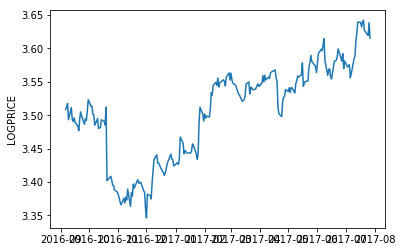

N size: df_train, df_val, df_test =  175 25 25


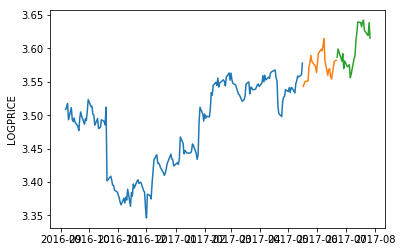

test_df: LOGPRICE for EBAY
DATE
2017-06-22   3.59
2017-06-23   3.60
2017-06-26   3.59
2017-06-27   3.58
2017-06-28   3.59
2017-06-29   3.57
2017-06-30   3.58
2017-07-03   3.57
2017-07-05   3.58
2017-07-06   3.56
2017-07-07   3.56
2017-07-10   3.58
2017-07-11   3.59
2017-07-12   3.61
2017-07-13   3.62
2017-07-14   3.64
2017-07-17   3.64
2017-07-18   3.63
2017-07-19   3.64
2017-07-20   3.64
2017-07-21   3.63
2017-07-24   3.62
2017-07-25   3.62
2017-07-26   3.64
2017-07-27   3.62
Name: LOGPRICE, dtype: float64


In [0]:
# mlp train, val, test split func

def timeseries_train_val_test_split(df,fcol,fval,dcol,pcol,cols,train_end,val_end):
  "Use to create static train, val and test samples for timeseries."
  # select one stock ticker
  df1 = df.loc[df[fcol]==fval].set_index(dcol)
  print(df1.describe().T)
  print(df1.columns)
  # plot series
  plt.plot(df1[pcol])
  plt.ylabel(pcol)
  plt.show()
  # select inputs & output
  inoutcols = cols  # ['LOGPRICE','FIRST DERIVATIVE','SECOND DERIVATIVE','THIRD DERIVATIVE','FOURTH DERIVATIVE']
  # select train, validation and test data
  df_train, df_val, df_test = df1[:train_end] [inoutcols], df1[train_end:val_end] [inoutcols], df1[val_end:] [inoutcols]
  print('N size: df_train, df_val, df_test = ',len(df_train),len(df_val), len(df_test))
  # plot train, val and test data
  plt.plot(df_train[pcol])
  plt.plot(df_val[pcol]) 
  plt.plot(df_test[pcol])
  plt.ylabel(pcol)
  plt.show()
  
  return df_train, df_val, df_test


# input parameters: 
df = stocks
fcol = 'TICKER'
fval = 'EBAY'
dcol  = 'DATE'
pcol = 'LOGPRICE'
cols = ['FIRST DERIVATIVE','SECOND DERIVATIVE','THIRD DERIVATIVE','FOURTH DERIVATIVE','LOGPRICE']
train_end = 175
val_end = 200

if __name__ == '__main__':
  """Create train, validation and test dfs."""
  train_df,val_df,test_df = timeseries_train_val_test_split(df,fcol,fval,dcol,pcol,cols,train_end,val_end)
  print(f'test_df: LOGPRICE for {fval}')
  print(test_df['LOGPRICE'])
  


### Description: Data Format for Multivariate Multistep MLP


**Description**

*1. Data prep step:*
* *Panel data must be split into samples*
* *Sample contains a sequence of time periods for inputs and the output*
* *Each sample represents the inputs/output sequence in the next time period* 

>  **time series example (3 time period sequences):** 

> **X1:** 0, 1, 2, 3, 4

> **X2:** 5, 6, 7, 8

> **y:** 9, 10, 11, 12

> * **1st sample:** 0, 1, 2

>  * **2nd sample:** 1, 2, 3

> * **3rd sample:** 2, 3, 4

## **EBAY from full dataset as example of Multivariate Input Multistep Inputs/Outputs**

### Multivariate - Multistep Samples Prep

In [0]:
# multivariate multi-step data preparation func

from numpy import array
# from numpy import hstack

def df2samples(train_df,val_df,test_df,n_steps_in=3,n_steps_out=2):
  "Transform stacked timeseries to sequence samples."
  # convert to np array
  train_ar = train_df.to_numpy()
  val_ar = val_df.to_numpy() 
  test_ar = test_df.to_numpy()
  print('train array dimensions')
  print(train_ar.shape)
  print('validation array dimensions')
  print(val_ar.shape)
  print('test array dimensions')
  print(test_ar.shape)
  # split a multivariate arrays into sequence samples
  def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
      # find the end of this pattern
      end_ix = i + n_steps_in
      out_end_ix = end_ix + n_steps_out-1
      # check if we are beyond the dataset
      if out_end_ix > len(sequences):
        break
      # gather input and output parts of the pattern
      seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
      X.append(seq_x)
      y.append(seq_y)
    return array(X), array(y)
  # create train, val, test samples
  X_train, y_train = split_sequences(train_ar, n_steps_in, n_steps_out)
  X_val, y_val = split_sequences(val_ar, n_steps_in, n_steps_out)
  X_test, y_test = split_sequences(test_ar, n_steps_in, n_steps_out)
  return X_train, y_train, X_val, y_val, X_test, y_test


# set input parameters:

# train_df, val_df, test_df created from timeseries_train_val_test_split()

# number INPUT STEPS
nsteps_input = 3
print(f'Number of input time steps: {nsteps_input}')
# number OUTPUT STEPS
nsteps_output = 2
print(f'Number of output time steps: {nsteps_output}')
# number FEATURES
nfeatures = 4
print(f'Number Model of Features: {nfeatures}')

# create samples
if __name__ == '__main__':
  """Create and summarize samples."""
  # create TRAIN SAMPLES
  X_train, y_train, X_val, y_val, X_test, y_test = df2samples(train_df,val_df,test_df,nsteps_input,nsteps_output)
  # summarize TRAIN SAMPLES
  print(f'Shape of input/output samples: X_train {X_train.shape}, y_train {y_train.shape}')
  print('Input/output samples X_train, y_train:')
  for i in range(len(X_train)):
    print(i, X_train[i], y_train[i])
    
    
  # summarize VAL SAMPLES
  print(f'Shape of input/output samples: X_val {X_val.shape}, y_val {y_val.shape}')
  print('Input, output samples X_val, y_val:')
  for i in range(len(X_val)):
    print(i, X_val[i], y_val[i])

  
  # summarize TEST SAMPLES
  print(f'Shape of input/output samples: X_test {X_test.shape}, y_test {y_test.shape}')
  print('Input, output samples X_test, y_test:')
  for i in range(len(X_test)):
    print(i, X_test[i], y_test[i])
  


Number of input time steps: 3
Number of output time steps: 2
Number Model of Features: 4
train array dimensions
(175, 5)
validation array dimensions
(25, 5)
test array dimensions
(25, 5)
Shape of input/output samples: X_train (172, 3, 4), y_train (172, 2)
Input/output samples X_train, y_train:
0 [[ 0.0040192  -0.0006384  -0.00622925 -0.02495434]
 [ 0.00308066 -0.00093855 -0.00030015  0.00592911]
 [ 0.00582744  0.00274678  0.00368533  0.00398547]] [3.51749787 3.49316863]
1 [[ 0.00308066 -0.00093855 -0.00030015  0.00592911]
 [ 0.00582744  0.00274678  0.00368533  0.00398547]
 [-0.02508266 -0.03091009 -0.03365688 -0.0373422 ]] [3.49316863 3.51124695]
2 [[ 0.00582744  0.00274678  0.00368533  0.00398547]
 [-0.02508266 -0.03091009 -0.03365688 -0.0373422 ]
 [ 0.01863996  0.04372262  0.07463271  0.10828959]] [3.51124695 3.49377656]
3 [[-0.02508266 -0.03091009 -0.03365688 -0.0373422 ]
 [ 0.01863996  0.04372262  0.07463271  0.10828959]
 [-0.01801297 -0.03665293 -0.08037555 -0.15500827]] [3.493776

## MLP Test Harness: Early Stopping, Model Checkpoint for Hyper Parameter Optimization 

### Step 1. Define, Fit and Evaluate Performance of Model

Using TensorFlow backend.
W0815 17:23:59.460281 140656540714880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0815 17:23:59.500183 140656540714880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0815 17:23:59.508078 140656540714880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0815 17:23:59.543820 140656540714880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



n_input:  12
X_train shape after reshape vectorization:  (172, 12)
X_val_flat shape after reshape vectorization:  (22, 12)
X_test_flat shape after reshape vectorization:  (22, 12)
n_input:  12
X_train shape after reshape vectorization:  (172, 12)
X_val_flat shape after reshape vectorization:  (22, 12)
X_test_flat shape after reshape vectorization:  (22, 12)


W0815 17:23:59.718052 140656540714880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0815 17:23:59.788584 140656540714880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 1s 4ms/step - loss: 8.2333 - mean_squared_error: 8.2333 - val_loss: 3.2615 - val_mean_squared_error: 3.2615

Epoch 00001: val_loss improved from inf to 3.26148, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.6770 - mean_squared_error: 0.6770 - val_loss: 0.0224 - val_mean_squared_error: 0.0224

Epoch 00002: val_loss improved from 3.26148 to 0.02238, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0030 - val_mean_squared_error: 0.0030

Epoch 00003: val_loss improved from 0.02238 to 0.00304, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0022 - val_mean_squared_error: 0.0022

Epoch 00004: val_loss

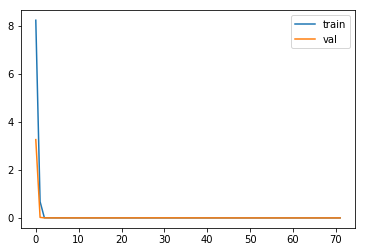

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 0s 2ms/step - loss: 8.3794 - mean_squared_error: 8.3794 - val_loss: 3.7453 - val_mean_squared_error: 3.7453

Epoch 00001: val_loss improved from inf to 3.74532, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.8649 - mean_squared_error: 0.8649 - val_loss: 0.0225 - val_mean_squared_error: 0.0225

Epoch 00002: val_loss improved from 3.74532 to 0.02255, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0027 - val_mean_squared_error: 0.0027

Epoch 00003: val_loss improved from 0.02255 to 0.00271, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0022 - val_mean_squared_error: 0.0022

Epoch 00004: val

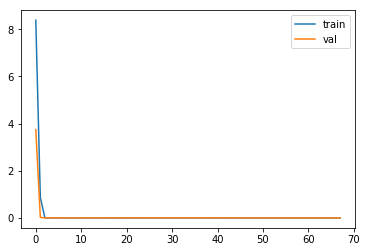

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 0s 2ms/step - loss: 8.7979 - mean_squared_error: 8.7979 - val_loss: 4.4177 - val_mean_squared_error: 4.4177

Epoch 00001: val_loss improved from inf to 4.41769, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 1.1026 - mean_squared_error: 1.1026 - val_loss: 0.0455 - val_mean_squared_error: 0.0455

Epoch 00002: val_loss improved from 4.41769 to 0.04549, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0040 - val_mean_squared_error: 0.0040

Epoch 00003: val_loss improved from 0.04549 to 0.00399, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0029 - val_mean_squared_error: 0.0029

Epoch 00004: val

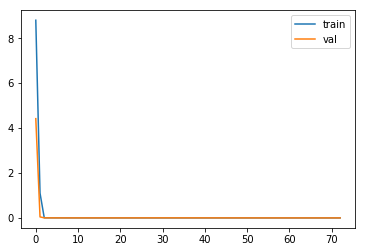

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 0s 3ms/step - loss: 8.5611 - mean_squared_error: 8.5611 - val_loss: 3.9155 - val_mean_squared_error: 3.9155

Epoch 00001: val_loss improved from inf to 3.91550, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.9275 - mean_squared_error: 0.9275 - val_loss: 0.0541 - val_mean_squared_error: 0.0541

Epoch 00002: val_loss improved from 3.91550 to 0.05409, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0043 - val_mean_squared_error: 0.0043

Epoch 00003: val_loss improved from 0.05409 to 0.00426, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0026 - val_mean_squared_error: 0.0026

Epoch 00004: val

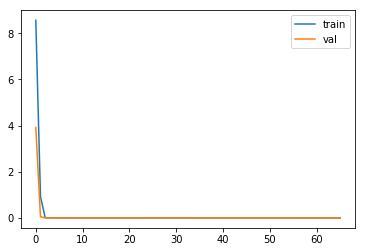

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 1s 3ms/step - loss: 8.3656 - mean_squared_error: 8.3656 - val_loss: 3.6678 - val_mean_squared_error: 3.6678

Epoch 00001: val_loss improved from inf to 3.66783, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.7999 - mean_squared_error: 0.7999 - val_loss: 0.0149 - val_mean_squared_error: 0.0149

Epoch 00002: val_loss improved from 3.66783 to 0.01488, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0023 - val_mean_squared_error: 0.0023

Epoch 00003: val_loss improved from 0.01488 to 0.00228, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0016 - val_mean_squared_error: 0.0016

Epoch 00004: val

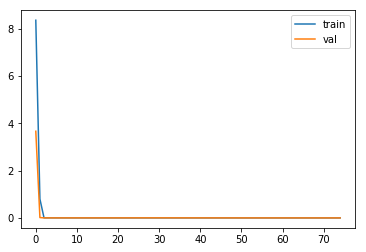

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 1s 3ms/step - loss: 8.3467 - mean_squared_error: 8.3467 - val_loss: 3.5440 - val_mean_squared_error: 3.5440

Epoch 00001: val_loss improved from inf to 3.54404, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.7561 - mean_squared_error: 0.7561 - val_loss: 0.0170 - val_mean_squared_error: 0.0170

Epoch 00002: val_loss improved from 3.54404 to 0.01697, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0032 - val_mean_squared_error: 0.0032

Epoch 00003: val_loss improved from 0.01697 to 0.00317, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0022 - val_mean_squared_error: 0.0022

Epoch 00004: val

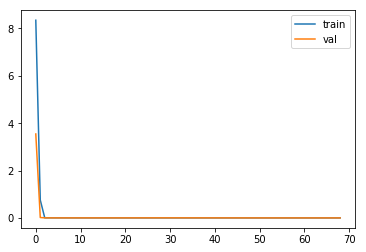

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 1s 4ms/step - loss: 7.7934 - mean_squared_error: 7.7934 - val_loss: 2.5252 - val_mean_squared_error: 2.5252

Epoch 00001: val_loss improved from inf to 2.52523, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.4179 - mean_squared_error: 0.4179 - val_loss: 0.0065 - val_mean_squared_error: 0.0065

Epoch 00002: val_loss improved from 2.52523 to 0.00651, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0023 - val_mean_squared_error: 0.0023

Epoch 00003: val_loss improved from 0.00651 to 0.00233, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00004: val

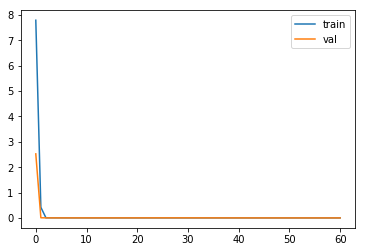

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 1s 4ms/step - loss: 8.9393 - mean_squared_error: 8.9393 - val_loss: 4.2928 - val_mean_squared_error: 4.2928

Epoch 00001: val_loss improved from inf to 4.29279, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 1.0130 - mean_squared_error: 1.0130 - val_loss: 0.0407 - val_mean_squared_error: 0.0407

Epoch 00002: val_loss improved from 4.29279 to 0.04069, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0025 - val_mean_squared_error: 0.0025

Epoch 00003: val_loss improved from 0.04069 to 0.00247, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0019 - val_mean_squared_error: 0.0019

Epoch 00004: val

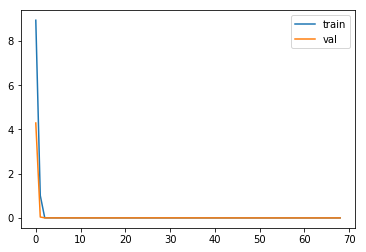

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 1s 4ms/step - loss: 8.5622 - mean_squared_error: 8.5622 - val_loss: 3.8003 - val_mean_squared_error: 3.8003

Epoch 00001: val_loss improved from inf to 3.80033, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.7978 - mean_squared_error: 0.7978 - val_loss: 0.0140 - val_mean_squared_error: 0.0140

Epoch 00002: val_loss improved from 3.80033 to 0.01398, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0024 - val_mean_squared_error: 0.0024

Epoch 00003: val_loss improved from 0.01398 to 0.00244, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00004: val

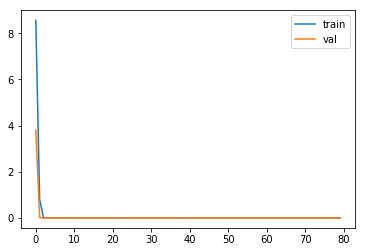

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 1s 4ms/step - loss: 8.0778 - mean_squared_error: 8.0778 - val_loss: 2.7767 - val_mean_squared_error: 2.7767

Epoch 00001: val_loss improved from inf to 2.77673, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.4781 - mean_squared_error: 0.4781 - val_loss: 0.0118 - val_mean_squared_error: 0.0118

Epoch 00002: val_loss improved from 2.77673 to 0.01182, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0030 - val_mean_squared_error: 0.0030

Epoch 00003: val_loss improved from 0.01182 to 0.00296, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0022 - val_mean_squared_error: 0.0022

Epoch 00004: val

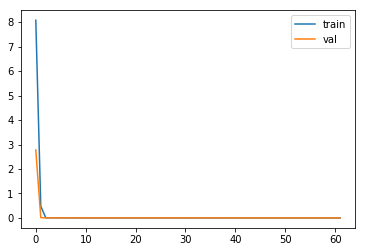

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 1s 5ms/step - loss: 7.6062 - mean_squared_error: 7.6062 - val_loss: 2.2408 - val_mean_squared_error: 2.2408

Epoch 00001: val_loss improved from inf to 2.24080, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.3401 - mean_squared_error: 0.3401 - val_loss: 0.0080 - val_mean_squared_error: 0.0080

Epoch 00002: val_loss improved from 2.24080 to 0.00798, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0038 - val_mean_squared_error: 0.0038

Epoch 00003: val_loss improved from 0.00798 to 0.00377, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0023 - val_mean_squared_error: 0.0023

Epoch 00004: val

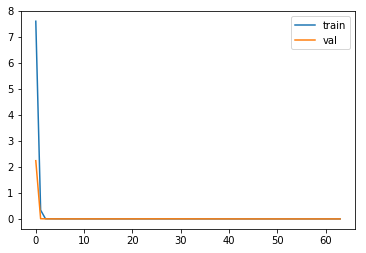

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 1s 5ms/step - loss: 7.7595 - mean_squared_error: 7.7595 - val_loss: 2.5035 - val_mean_squared_error: 2.5035

Epoch 00001: val_loss improved from inf to 2.50352, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.4101 - mean_squared_error: 0.4101 - val_loss: 0.0076 - val_mean_squared_error: 0.0076

Epoch 00002: val_loss improved from 2.50352 to 0.00763, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0027 - val_mean_squared_error: 0.0027

Epoch 00003: val_loss improved from 0.00763 to 0.00275, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0022 - val_mean_squared_error: 0.0022

Epoch 00004: val

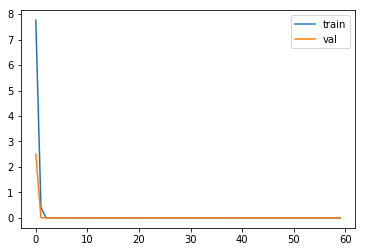

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 1s 6ms/step - loss: 8.7817 - mean_squared_error: 8.7817 - val_loss: 4.1899 - val_mean_squared_error: 4.1899

Epoch 00001: val_loss improved from inf to 4.18986, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 1.0799 - mean_squared_error: 1.0799 - val_loss: 0.0781 - val_mean_squared_error: 0.0781

Epoch 00002: val_loss improved from 4.18986 to 0.07814, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0034 - val_mean_squared_error: 0.0034

Epoch 00003: val_loss improved from 0.07814 to 0.00341, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0021 - val_mean_squared_error: 0.0021

Epoch 00004: val

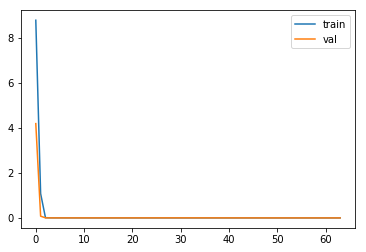

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 1s 6ms/step - loss: 8.5163 - mean_squared_error: 8.5163 - val_loss: 3.7543 - val_mean_squared_error: 3.7543

Epoch 00001: val_loss improved from inf to 3.75426, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.8347 - mean_squared_error: 0.8347 - val_loss: 0.0247 - val_mean_squared_error: 0.0247

Epoch 00002: val_loss improved from 3.75426 to 0.02472, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0036 - val_mean_squared_error: 0.0036

Epoch 00003: val_loss improved from 0.02472 to 0.00362, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0027 - val_mean_squared_error: 0.0027

Epoch 00004: val

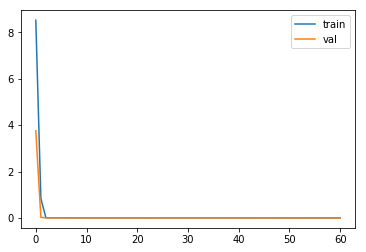

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 1s 6ms/step - loss: 8.7855 - mean_squared_error: 8.7855 - val_loss: 4.3816 - val_mean_squared_error: 4.3816

Epoch 00001: val_loss improved from inf to 4.38160, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 1.1117 - mean_squared_error: 1.1117 - val_loss: 0.0507 - val_mean_squared_error: 0.0507

Epoch 00002: val_loss improved from 4.38160 to 0.05068, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0032 - val_mean_squared_error: 0.0032

Epoch 00003: val_loss improved from 0.05068 to 0.00319, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0023 - val_mean_squared_error: 0.0023

Epoch 00004: val

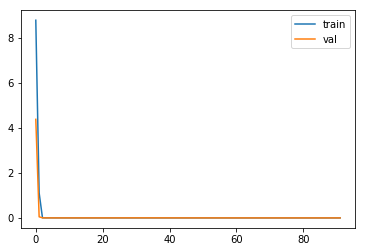

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 1s 7ms/step - loss: 8.2681 - mean_squared_error: 8.2681 - val_loss: 3.4897 - val_mean_squared_error: 3.4897

Epoch 00001: val_loss improved from inf to 3.48966, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.7726 - mean_squared_error: 0.7726 - val_loss: 0.0310 - val_mean_squared_error: 0.0310

Epoch 00002: val_loss improved from 3.48966 to 0.03101, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0030 - val_mean_squared_error: 0.0030

Epoch 00003: val_loss improved from 0.03101 to 0.00301, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0022 - val_mean_squared_error: 0.0022

Epoch 00004: val

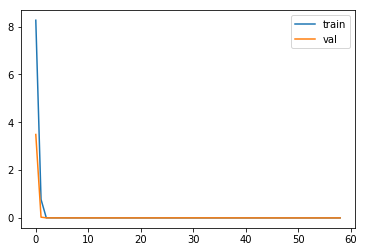

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 1s 7ms/step - loss: 7.7234 - mean_squared_error: 7.7234 - val_loss: 2.3783 - val_mean_squared_error: 2.3783

Epoch 00001: val_loss improved from inf to 2.37826, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.3769 - mean_squared_error: 0.3769 - val_loss: 0.0060 - val_mean_squared_error: 0.0060

Epoch 00002: val_loss improved from 2.37826 to 0.00598, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0027 - val_mean_squared_error: 0.0027

Epoch 00003: val_loss improved from 0.00598 to 0.00268, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0022 - val_mean_squared_error: 0.0022

Epoch 00004: val

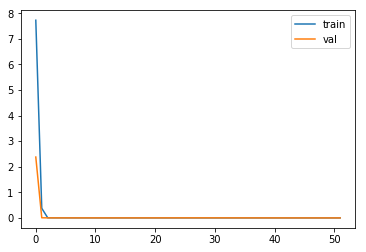

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 1s 7ms/step - loss: 8.2276 - mean_squared_error: 8.2276 - val_loss: 3.2870 - val_mean_squared_error: 3.2870

Epoch 00001: val_loss improved from inf to 3.28699, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.6659 - mean_squared_error: 0.6659 - val_loss: 0.0174 - val_mean_squared_error: 0.0174

Epoch 00002: val_loss improved from 3.28699 to 0.01737, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0031 - val_mean_squared_error: 0.0031

Epoch 00003: val_loss improved from 0.01737 to 0.00312, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0021 - val_mean_squared_error: 0.0021

Epoch 00004: val

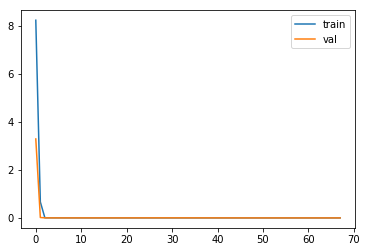

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 1s 7ms/step - loss: 6.9439 - mean_squared_error: 6.9439 - val_loss: 0.9388 - val_mean_squared_error: 0.9388

Epoch 00001: val_loss improved from inf to 0.93877, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0844 - mean_squared_error: 0.0844 - val_loss: 0.0025 - val_mean_squared_error: 0.0025

Epoch 00002: val_loss improved from 0.93877 to 0.00251, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0016 - val_mean_squared_error: 0.0016

Epoch 00003: val_loss improved from 0.00251 to 0.00164, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0015 - val_mean_squared_error: 0.0015

Epoch 00004: val

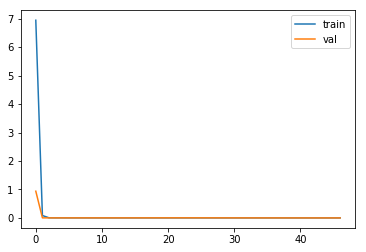

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 1s 8ms/step - loss: 6.7453 - mean_squared_error: 6.7453 - val_loss: 0.8351 - val_mean_squared_error: 0.8351

Epoch 00001: val_loss improved from inf to 0.83514, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0778 - mean_squared_error: 0.0778 - val_loss: 0.0026 - val_mean_squared_error: 0.0026

Epoch 00002: val_loss improved from 0.83514 to 0.00255, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00003: val_loss improved from 0.00255 to 0.00169, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0016 - val_mean_squared_error: 0.0016

Epoch 00004: val

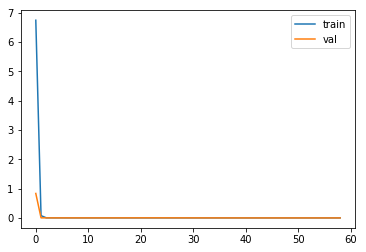

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 1s 8ms/step - loss: 6.9636 - mean_squared_error: 6.9636 - val_loss: 0.8797 - val_mean_squared_error: 0.8797

Epoch 00001: val_loss improved from inf to 0.87965, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0719 - mean_squared_error: 0.0719 - val_loss: 0.0020 - val_mean_squared_error: 0.0020

Epoch 00002: val_loss improved from 0.87965 to 0.00204, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00003: val_loss improved from 0.00204 to 0.00166, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0016 - val_mean_squared_error: 0.0016

Epoch 00004: val

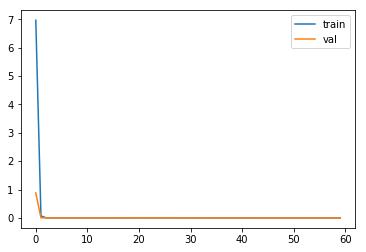

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 2s 9ms/step - loss: 6.5520 - mean_squared_error: 6.5520 - val_loss: 0.6475 - val_mean_squared_error: 0.6475

Epoch 00001: val_loss improved from inf to 0.64753, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0467 - mean_squared_error: 0.0467 - val_loss: 0.0023 - val_mean_squared_error: 0.0023

Epoch 00002: val_loss improved from 0.64753 to 0.00228, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00003: val_loss improved from 0.00228 to 0.00169, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0016 - val_mean_squared_error: 0.0016

Epoch 00004: val

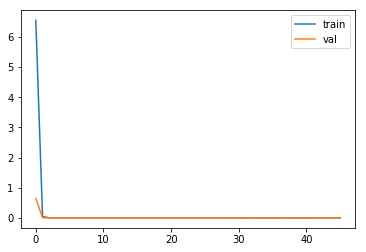

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 2s 9ms/step - loss: 6.3472 - mean_squared_error: 6.3472 - val_loss: 0.4524 - val_mean_squared_error: 0.4524

Epoch 00001: val_loss improved from inf to 0.45238, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00002: val_loss improved from 0.45238 to 0.00166, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0013 - val_mean_squared_error: 0.0013

Epoch 00003: val_loss improved from 0.00166 to 0.00132, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0014 - val_mean_squared_error: 0.0014

Epoch 00004: val

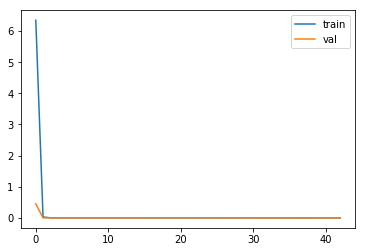

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 2s 9ms/step - loss: 6.0597 - mean_squared_error: 6.0597 - val_loss: 0.3880 - val_mean_squared_error: 0.3880

Epoch 00001: val_loss improved from inf to 0.38796, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00002: val_loss improved from 0.38796 to 0.00177, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0014 - val_mean_squared_error: 0.0014

Epoch 00003: val_loss improved from 0.00177 to 0.00144, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0015 - val_mean_squared_error: 0.0015

Epoch 00004: val

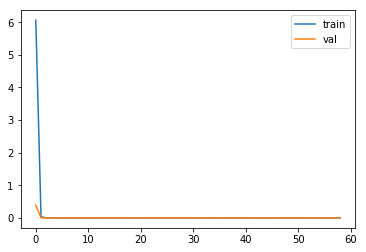

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 2s 9ms/step - loss: 6.4253 - mean_squared_error: 6.4253 - val_loss: 0.5458 - val_mean_squared_error: 0.5458

Epoch 00001: val_loss improved from inf to 0.54576, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.0016 - val_mean_squared_error: 0.0016

Epoch 00002: val_loss improved from 0.54576 to 0.00164, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0014 - val_mean_squared_error: 0.0014

Epoch 00003: val_loss improved from 0.00164 to 0.00135, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0014 - val_mean_squared_error: 0.0014

Epoch 00004: val

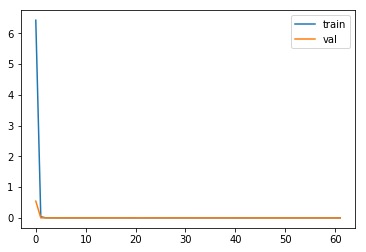

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 2s 10ms/step - loss: 6.2984 - mean_squared_error: 6.2984 - val_loss: 0.4100 - val_mean_squared_error: 0.4100

Epoch 00001: val_loss improved from inf to 0.40998, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00002: val_loss improved from 0.40998 to 0.00165, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0014 - val_mean_squared_error: 0.0014

Epoch 00003: val_loss improved from 0.00165 to 0.00139, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0015 - val_mean_squared_error: 0.0015

Epoch 00004: va

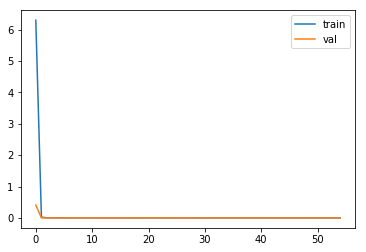

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 2s 10ms/step - loss: 6.3910 - mean_squared_error: 6.3910 - val_loss: 0.5412 - val_mean_squared_error: 0.5412

Epoch 00001: val_loss improved from inf to 0.54124, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00002: val_loss improved from 0.54124 to 0.00177, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0013 - val_mean_squared_error: 0.0013

Epoch 00003: val_loss improved from 0.00177 to 0.00129, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0014 - val_mean_squared_error: 0.0014

Epoch 00004: va

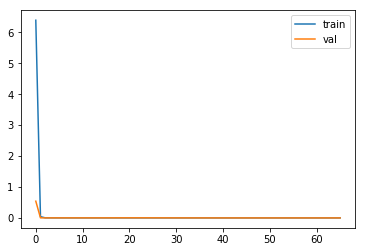

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 2s 10ms/step - loss: 7.1089 - mean_squared_error: 7.1089 - val_loss: 0.9934 - val_mean_squared_error: 0.9934

Epoch 00001: val_loss improved from inf to 0.99337, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0851 - mean_squared_error: 0.0851 - val_loss: 0.0016 - val_mean_squared_error: 0.0016

Epoch 00002: val_loss improved from 0.99337 to 0.00163, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0013 - val_mean_squared_error: 0.0013

Epoch 00003: val_loss improved from 0.00163 to 0.00132, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0014 - val_mean_squared_error: 0.0014

Epoch 00004: va

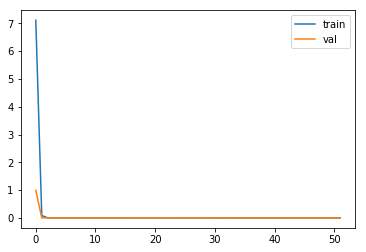

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 2s 11ms/step - loss: 6.2807 - mean_squared_error: 6.2807 - val_loss: 0.4611 - val_mean_squared_error: 0.4611

Epoch 00001: val_loss improved from inf to 0.46107, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.0021 - val_mean_squared_error: 0.0021

Epoch 00002: val_loss improved from 0.46107 to 0.00214, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00003: val_loss improved from 0.00214 to 0.00169, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00004: va

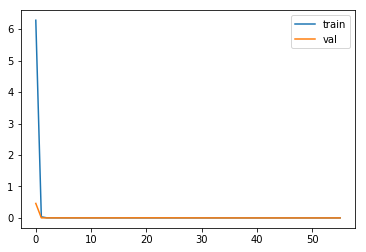

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 2s 11ms/step - loss: 6.9664 - mean_squared_error: 6.9664 - val_loss: 0.9982 - val_mean_squared_error: 0.9982

Epoch 00001: val_loss improved from inf to 0.99817, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0925 - mean_squared_error: 0.0925 - val_loss: 0.0027 - val_mean_squared_error: 0.0027

Epoch 00002: val_loss improved from 0.99817 to 0.00273, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0020 - val_mean_squared_error: 0.0020

Epoch 00003: val_loss improved from 0.00273 to 0.00198, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00004: va

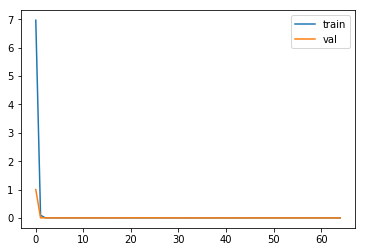

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 2s 11ms/step - loss: 6.4352 - mean_squared_error: 6.4352 - val_loss: 0.5915 - val_mean_squared_error: 0.5915

Epoch 00001: val_loss improved from inf to 0.59152, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0430 - mean_squared_error: 0.0430 - val_loss: 0.0015 - val_mean_squared_error: 0.0015

Epoch 00002: val_loss improved from 0.59152 to 0.00145, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0013 - val_mean_squared_error: 0.0013

Epoch 00003: val_loss improved from 0.00145 to 0.00126, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0013 - val_mean_squared_error: 0.0013

Epoch 00004: va

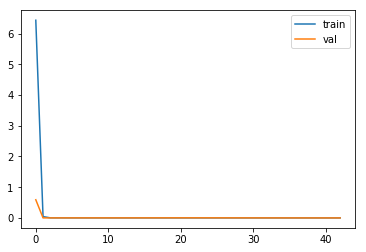

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 2s 12ms/step - loss: 6.4927 - mean_squared_error: 6.4927 - val_loss: 0.5902 - val_mean_squared_error: 0.5902

Epoch 00001: val_loss improved from inf to 0.59019, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0020 - val_mean_squared_error: 0.0020

Epoch 00002: val_loss improved from 0.59019 to 0.00198, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0016 - val_mean_squared_error: 0.0016

Epoch 00003: val_loss improved from 0.00198 to 0.00156, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0015 - val_mean_squared_error: 0.0015

Epoch 00004: va

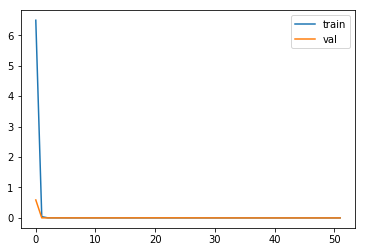

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 2s 12ms/step - loss: 6.9421 - mean_squared_error: 6.9421 - val_loss: 1.0078 - val_mean_squared_error: 1.0078

Epoch 00001: val_loss improved from inf to 1.00780, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0025 - val_mean_squared_error: 0.0025

Epoch 00002: val_loss improved from 1.00780 to 0.00247, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0015 - val_mean_squared_error: 0.0015

Epoch 00003: val_loss improved from 0.00247 to 0.00154, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0014 - val_mean_squared_error: 0.0014

Epoch 00004: va

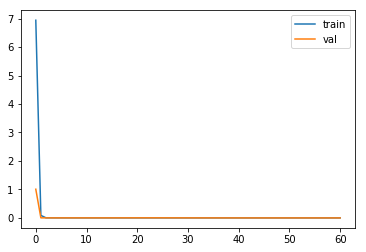

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 2s 12ms/step - loss: 7.2941 - mean_squared_error: 7.2941 - val_loss: 1.2330 - val_mean_squared_error: 1.2330

Epoch 00001: val_loss improved from inf to 1.23300, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.1181 - mean_squared_error: 0.1181 - val_loss: 0.0023 - val_mean_squared_error: 0.0023

Epoch 00002: val_loss improved from 1.23300 to 0.00234, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00003: val_loss improved from 0.00234 to 0.00177, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0016 - val_mean_squared_error: 0.0016

Epoch 00004: va

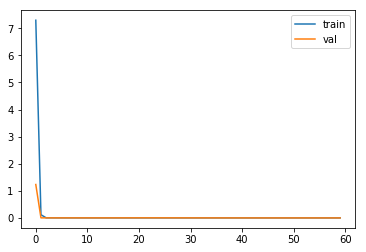

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 2s 13ms/step - loss: 6.4154 - mean_squared_error: 6.4154 - val_loss: 0.5164 - val_mean_squared_error: 0.5164

Epoch 00001: val_loss improved from inf to 0.51645, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00002: val_loss improved from 0.51645 to 0.00175, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0015 - val_mean_squared_error: 0.0015

Epoch 00003: val_loss improved from 0.00175 to 0.00148, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0015 - val_mean_squared_error: 0.0015

Epoch 00004: va

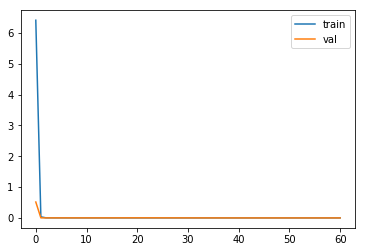

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 2s 13ms/step - loss: 6.9329 - mean_squared_error: 6.9329 - val_loss: 0.9656 - val_mean_squared_error: 0.9656

Epoch 00001: val_loss improved from inf to 0.96563, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 1ms/step - loss: 0.0983 - mean_squared_error: 0.0983 - val_loss: 0.0021 - val_mean_squared_error: 0.0021

Epoch 00002: val_loss improved from 0.96563 to 0.00209, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0014 - val_mean_squared_error: 0.0014

Epoch 00003: val_loss improved from 0.00209 to 0.00142, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0015 - val_mean_squared_error: 0.0015

Epoch 00004: va

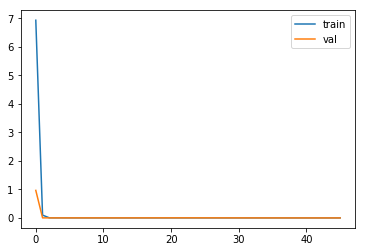

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 2s 13ms/step - loss: 5.2107 - mean_squared_error: 5.2107 - val_loss: 0.0080 - val_mean_squared_error: 0.0080

Epoch 00001: val_loss improved from inf to 0.00798, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0015 - val_mean_squared_error: 0.0015

Epoch 00002: val_loss improved from 0.00798 to 0.00146, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00003: val_loss did not improve from 0.00146
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00004: val_loss did not improve from 0.00146
Epoch 5

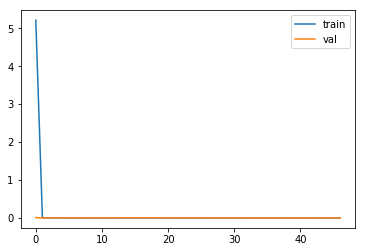

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 2s 14ms/step - loss: 5.0103 - mean_squared_error: 5.0103 - val_loss: 0.0077 - val_mean_squared_error: 0.0077

Epoch 00001: val_loss improved from inf to 0.00773, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0015 - val_mean_squared_error: 0.0015

Epoch 00002: val_loss improved from 0.00773 to 0.00149, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00003: val_loss did not improve from 0.00149
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00004: val_loss did not improve from 0.00149
Epoch 5

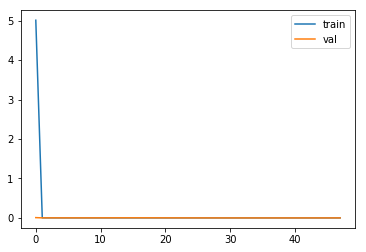

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 2s 14ms/step - loss: 4.6853 - mean_squared_error: 4.6853 - val_loss: 0.0023 - val_mean_squared_error: 0.0023

Epoch 00001: val_loss improved from inf to 0.00233, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0021 - val_mean_squared_error: 0.0021

Epoch 00002: val_loss improved from 0.00233 to 0.00207, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0020 - val_mean_squared_error: 0.0020

Epoch 00003: val_loss improved from 0.00207 to 0.00204, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0020 - val_mean_squared_error: 0.0020

Epoch 00004: va

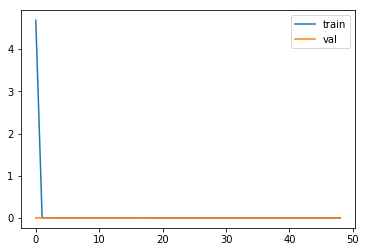

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 2s 14ms/step - loss: 4.8642 - mean_squared_error: 4.8642 - val_loss: 0.0062 - val_mean_squared_error: 0.0062

Epoch 00001: val_loss improved from inf to 0.00619, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0016 - val_mean_squared_error: 0.0016

Epoch 00002: val_loss improved from 0.00619 to 0.00156, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00003: val_loss did not improve from 0.00156
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00004: val_loss did not improve from 0.00156
Epoch 5

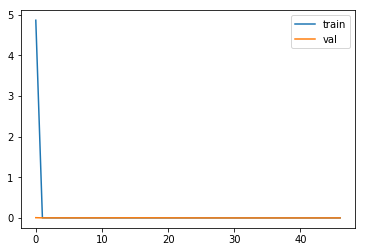

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 2s 14ms/step - loss: 4.5331 - mean_squared_error: 4.5331 - val_loss: 0.0038 - val_mean_squared_error: 0.0038

Epoch 00001: val_loss improved from inf to 0.00379, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0016 - val_mean_squared_error: 0.0016

Epoch 00002: val_loss improved from 0.00379 to 0.00164, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00003: val_loss did not improve from 0.00164
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0019 - val_mean_squared_error: 0.0019

Epoch 00004: val_loss did not improve from 0.00164
Epoch 5

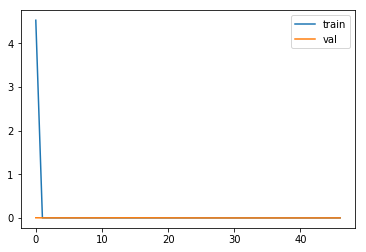

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 3s 15ms/step - loss: 4.9407 - mean_squared_error: 4.9407 - val_loss: 0.0063 - val_mean_squared_error: 0.0063

Epoch 00001: val_loss improved from inf to 0.00626, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0015 - val_mean_squared_error: 0.0015

Epoch 00002: val_loss improved from 0.00626 to 0.00146, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00003: val_loss did not improve from 0.00146
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00004: val_loss did not improve from 0.00146
Epoch 5

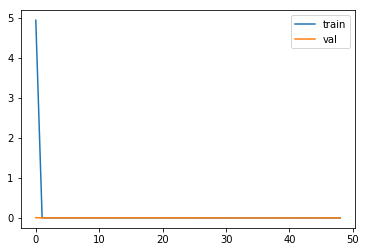

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 3s 15ms/step - loss: 4.9104 - mean_squared_error: 4.9104 - val_loss: 0.0039 - val_mean_squared_error: 0.0039

Epoch 00001: val_loss improved from inf to 0.00391, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0020 - val_mean_squared_error: 0.0020

Epoch 00002: val_loss improved from 0.00391 to 0.00200, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0020 - val_mean_squared_error: 0.0020

Epoch 00003: val_loss did not improve from 0.00200
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0020 - val_mean_squared_error: 0.0020

Epoch 00004: val_loss did not improve from 0.00200
Epoch 5

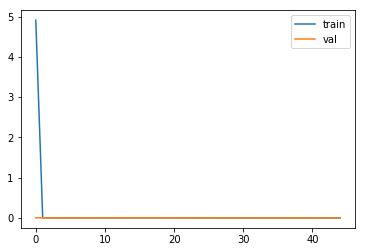

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 3s 15ms/step - loss: 5.0879 - mean_squared_error: 5.0879 - val_loss: 0.0068 - val_mean_squared_error: 0.0068

Epoch 00001: val_loss improved from inf to 0.00676, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0016 - val_mean_squared_error: 0.0016

Epoch 00002: val_loss improved from 0.00676 to 0.00157, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00003: val_loss did not improve from 0.00157
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00004: val_loss did not improve from 0.00157
Epoch 5

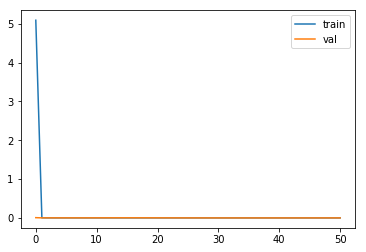

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 3s 16ms/step - loss: 4.7851 - mean_squared_error: 4.7851 - val_loss: 0.0050 - val_mean_squared_error: 0.0050

Epoch 00001: val_loss improved from inf to 0.00498, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0016 - val_mean_squared_error: 0.0016

Epoch 00002: val_loss improved from 0.00498 to 0.00165, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00003: val_loss did not improve from 0.00165
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0019 - val_mean_squared_error: 0.0019

Epoch 00004: val_loss did not improve from 0.00165
Epoch 5

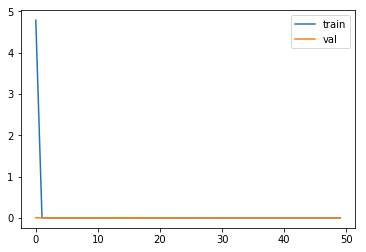

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 3s 15ms/step - loss: 4.9757 - mean_squared_error: 4.9757 - val_loss: 0.0031 - val_mean_squared_error: 0.0031

Epoch 00001: val_loss improved from inf to 0.00313, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0016 - val_mean_squared_error: 0.0016

Epoch 00002: val_loss improved from 0.00313 to 0.00162, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00003: val_loss did not improve from 0.00162
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00004: val_loss did not improve from 0.00162
Epoch 5

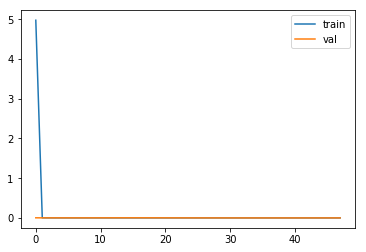

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 3s 16ms/step - loss: 5.1769 - mean_squared_error: 5.1769 - val_loss: 0.0087 - val_mean_squared_error: 0.0087

Epoch 00001: val_loss improved from inf to 0.00875, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00002: val_loss improved from 0.00875 to 0.00179, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00003: val_loss did not improve from 0.00179
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0019 - val_mean_squared_error: 0.0019

Epoch 00004: val_loss did not improve from 0.00179
Epoch 5

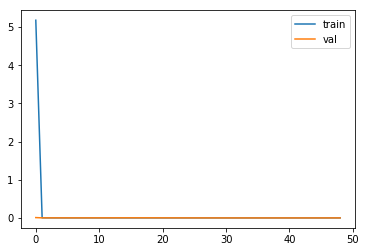

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 3s 16ms/step - loss: 5.1473 - mean_squared_error: 5.1473 - val_loss: 0.0063 - val_mean_squared_error: 0.0063

Epoch 00001: val_loss improved from inf to 0.00627, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0016 - val_mean_squared_error: 0.0016

Epoch 00002: val_loss improved from 0.00627 to 0.00158, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00003: val_loss did not improve from 0.00158
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00004: val_loss did not improve from 0.00158
Epoch 5

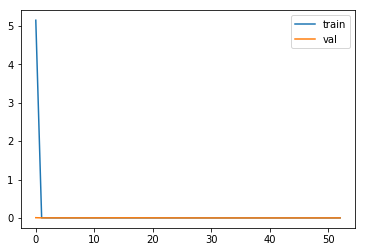

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 3s 17ms/step - loss: 4.7688 - mean_squared_error: 4.7688 - val_loss: 0.0027 - val_mean_squared_error: 0.0027

Epoch 00001: val_loss improved from inf to 0.00266, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00002: val_loss improved from 0.00266 to 0.00175, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00003: val_loss did not improve from 0.00175
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0019 - val_mean_squared_error: 0.0019

Epoch 00004: val_loss did not improve from 0.00175
Epoch 5

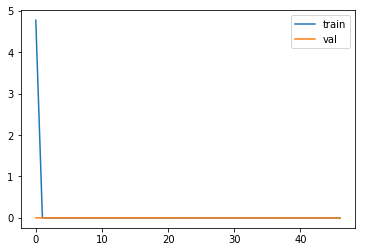

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 3s 17ms/step - loss: 4.9271 - mean_squared_error: 4.9271 - val_loss: 0.0033 - val_mean_squared_error: 0.0033

Epoch 00001: val_loss improved from inf to 0.00326, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0014 - val_mean_squared_error: 0.0014

Epoch 00002: val_loss improved from 0.00326 to 0.00142, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00003: val_loss did not improve from 0.00142
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00004: val_loss did not improve from 0.00142
Epoch 5

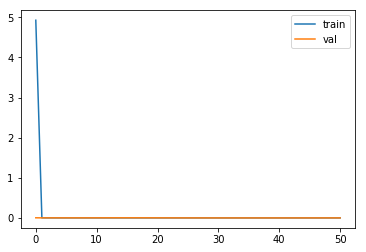

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 3s 17ms/step - loss: 5.0915 - mean_squared_error: 5.0915 - val_loss: 0.0081 - val_mean_squared_error: 0.0081

Epoch 00001: val_loss improved from inf to 0.00807, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0015 - val_mean_squared_error: 0.0015

Epoch 00002: val_loss improved from 0.00807 to 0.00152, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00003: val_loss did not improve from 0.00152
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00004: val_loss did not improve from 0.00152
Epoch 5

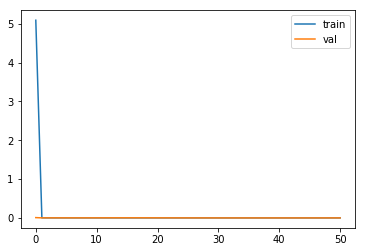

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 3s 17ms/step - loss: 4.7700 - mean_squared_error: 4.7700 - val_loss: 0.0026 - val_mean_squared_error: 0.0026

Epoch 00001: val_loss improved from inf to 0.00257, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0022 - val_mean_squared_error: 0.0022

Epoch 00002: val_loss improved from 0.00257 to 0.00222, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0021 - val_mean_squared_error: 0.0021

Epoch 00003: val_loss improved from 0.00222 to 0.00207, saving model to weights.best_mlp.hdf5
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0020 - val_mean_squared_error: 0.0020

Epoch 00004: va

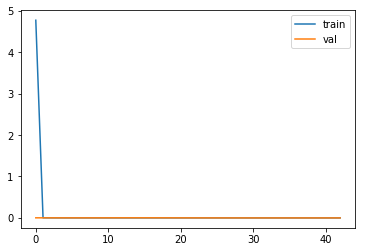

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 3s 18ms/step - loss: 4.8398 - mean_squared_error: 4.8398 - val_loss: 0.0025 - val_mean_squared_error: 0.0025

Epoch 00001: val_loss improved from inf to 0.00249, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0017 - val_mean_squared_error: 0.0017

Epoch 00002: val_loss improved from 0.00249 to 0.00173, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0019 - val_mean_squared_error: 0.0019

Epoch 00003: val_loss did not improve from 0.00173
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0019 - val_mean_squared_error: 0.0019

Epoch 00004: val_loss did not improve from 0.00173
Epoch 5

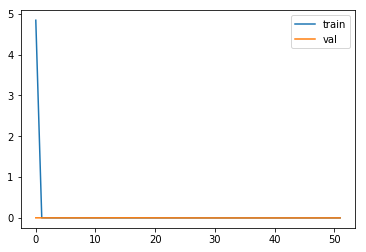

None
Train on 172 samples, validate on 22 samples
Epoch 1/200
172/172 [==============================] - 3s 18ms/step - loss: 4.9815 - mean_squared_error: 4.9815 - val_loss: 0.0029 - val_mean_squared_error: 0.0029

Epoch 00001: val_loss improved from inf to 0.00288, saving model to weights.best_mlp.hdf5
Epoch 2/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0016 - val_mean_squared_error: 0.0016

Epoch 00002: val_loss improved from 0.00288 to 0.00162, saving model to weights.best_mlp.hdf5
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00003: val_loss did not improve from 0.00162
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0019 - val_mean_squared_error: 0.0019

Epoch 00004: val_loss did not improve from 0.00162
Epoch 5

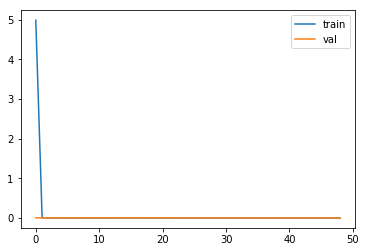

None


In [0]:
# multivariate multi-step mlp

# import libs
from pandas import DataFrame
import numpy as np
from numpy import array
# from numpy import hstack
from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error 
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from matplotlib import pyplot

# flatten input data for MLP (TO SPEED UP CALCULATIONS IN TF)
def flatten(nsteps_input,nfeatures,X_train,X_val,X_test):
  """MLP: vectorize input samples"""
  # calc new n_input dim
  n_input = nsteps_input*nfeatures  # - FLATTENED NUMBER OF COLUMNS IN INPUT SAMPLE
  print('n_input: ', n_input)
  # flatten train, val, test samples
  X_train_flat = X_train.reshape((X_train.shape[0],n_input))
  print('X_train shape after reshape vectorization: ', X_train_flat.shape)
  X_val_flat = X_val.reshape((X_val.shape[0], n_input)) # CREATES FLATTENED INPUT SAMPLE
  print('X_val_flat shape after reshape vectorization: ', X_val_flat.shape)
  X_test_flat = X_test.reshape((X_test.shape[0], n_input)) # CREATES FLATTENED INPUT SAMPLE
  print('X_test_flat shape after reshape vectorization: ', X_test_flat.shape)
  
  return n_input,X_train_flat,X_val_flat,X_test_flat 


# set parameters
nsteps_input = 3
nfeatures = 4
# create flattened X train, val, test samples
n_input, X_train_flat, X_val_flat, X_test_flat = flatten(nsteps_input,nfeatures,X_train,X_val,X_test)

# model definition, fit, eval
def model_def_fit_eval(X_train_flat,y_train,X_val_flat,y_val,wts_fpath,n_nodes=100,n_epochs=200,n_patience=2):
  "Define and Fit - hyper params: n_nodes, n_epochs, estop_criteria, n_patience"
  # model define
  model = Sequential()
  model.add(Dense(n_nodes, activation='relu', input_dim=n_input))
  model.add(Dense(nsteps_output))
  # model compile
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
  # early stopping
  early_stop = EarlyStopping(monitor='val_loss', patience=n_patience, verbose=1)
  # checkpoint
  # filepath="weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
  filepath= wts_fpath  # "weights.best_mlp.hdf5"
  checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
  callbacks_list = [early_stop, checkpoint]
  # model fit
  history = model.fit(X_train_flat,y_train,validation_data=(X_val_flat,y_val),epochs=n_epochs,batch_size=1,verbose=1,callbacks=callbacks_list,shuffle=False)
  # hyper parameter values
  print(f'Number of nodes in the hidden layer: {n_nodes}')
  print(f'Number of epoches: {n_epochs}')
  print(f'Patience: Epochs before early stop: {n_patience}')
  # model evaluate
  _, train_mse = model.evaluate(X_train_flat, y_train, verbose=0)
  _, val_mse = model.evaluate(X_val_flat, y_val, verbose=0)
  print(f'Train: {train_mse:.6f}, Validation: {val_mse:.6f}')
  # plot accuracy of model learning
  pyplot.plot(history.history['mean_squared_error'], label='train')
  pyplot.plot(history.history['val_mean_squared_error'], label='val')
  pyplot.legend()
  pyplot.show()
  return


# set parameters and run model
if __name__ == '__main__':
  # initialize flattened X train, val, test samples
  n_input, X_train_flat, X_val_flat, X_test_flat = flatten(nsteps_input,nfeatures,X_train,X_val,X_test)
  # file path for weights
  wts_fpath = "weights.best_mlp.hdf5"
  # hyper parameter combos
  n_nodes = [50,100,200]
  n_epochs = [100,1000,2000]
  n_patience = [2,3,4]
  # run model
  for n in n_nodes:
    for e in n_epochs:
      for p in n_patience:
        model_output = model_def_fit_eval(X_train_flat,y_train,X_val_flat,y_val,wts_fpath,n_nodes=n,n_patience=p)
        print(model_output)
          
  

### Step 2. Best Model Prediction and Performance on Test + Export Predictions to CSV


Defined model and loaded weights from best model
N size: y_pred  22
N size: y_actual  22


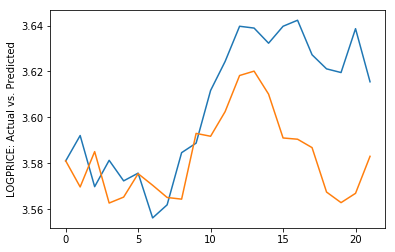

Root Mean Squared Error: 0.032
Mean Squared Error: 0.001
Mean Absolute Error: 0.026
Median Absolute Error: 0.021
Explained Variance: 0.324
R^2: -0.295
None
   MODEL TICKER       DATE  LOGPRICE  Pred_LOGPRICE
0    MLP   EBAY 2017-06-27      3.58           3.58
1    MLP   EBAY 2017-06-28      3.59           3.57
2    MLP   EBAY 2017-06-29      3.57           3.59
3    MLP   EBAY 2017-06-30      3.58           3.56
4    MLP   EBAY 2017-07-03      3.57           3.57
5    MLP   EBAY 2017-07-05      3.58           3.58
6    MLP   EBAY 2017-07-06      3.56           3.57
7    MLP   EBAY 2017-07-07      3.56           3.57
8    MLP   EBAY 2017-07-10      3.58           3.56
9    MLP   EBAY 2017-07-11      3.59           3.59
10   MLP   EBAY 2017-07-12      3.61           3.59
11   MLP   EBAY 2017-07-13      3.62           3.60
12   MLP   EBAY 2017-07-14      3.64           3.62
13   MLP   EBAY 2017-07-17      3.64           3.62
14   MLP   EBAY 2017-07-18      3.63           3.61
15   MLP   E

In [0]:
# tuned hyper parameters for best model
'''
Epoch 00048: val_loss did not improve from 0.00024
Epoch 00048: early stopping
Number of nodes in the hidden layer: 200
Number of epoches: 200
Early stopping criteria: loss
Patience: Epochs before early stop: 4
Train: 0.009736, Validation: 0.000552
'''

# Use weights from best model to predict test
def best_model_def_loadwts_pred(X_test_flat,y_test,n_nodes,wts_fpath):  # ,n_nodes=100,n_epochs=200,estop_criteria='loss',n_patience=2):
  "Tuned MLP: Use Weights from Best Model"
  # model define
  model = Sequential()
  model.add(Dense(n_nodes, activation='relu', input_dim=n_input))
  model.add(Dense(nsteps_output))
  # load weights
  model.load_weights(wts_fpath)  # "weights.best.hdf5")
  # model compile
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
  print("Defined model and loaded weights from best model")
  # model predict
  yhat = model.predict(X_test_flat, verbose=0)
  # predicted: select last step of predicted multistep output
  y_pred = np.asarray([x[-1] for x in yhat])
  print('N size: y_pred ', len(y_pred))
  # actual: select last step of actual multistep output
  y_actual = np.asarray([x[-1] for x in y_test])
  print('N size: y_actual ', len(y_actual))
  # plot actual & predicted y on test
  plt.plot(y_actual)
  plt.plot(y_pred)
  plt.ylabel('LOGPRICE: Actual vs. Predicted')
  plt.show()
  return y_actual, y_pred
  

# model performance metrics
def y_pred_metrics(y_actual, y_pred):
  "Use saved weights from best model checkpoint to predict test sample."
  # import error metrics from sklearn
  from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error
  # compute root mean squared error of predictions
  rmse = np.sqrt(np.mean(np.square((y_actual - y_pred)),axis=0))
  print(f'Root Mean Squared Error: {rmse:.3f}')
  # compute mean squared error
  mae = mean_squared_error(y_actual, y_pred)
  print(f'Mean Squared Error: {mae:.3f}')
  # compute mean absolute error
  mae = mean_absolute_error(y_actual, y_pred)
  print(f'Mean Absolute Error: {mae:.3f}')
  # compute median absolute error
  mdae = median_absolute_error(y_actual, y_pred)
  print(f'Median Absolute Error: {mdae:.3f}')
  # compute explained_variance_score
  evar = explained_variance_score(y_actual, y_pred)
  print(f'Explained Variance: {evar:.3f}')
  # compute R2
  r2 = r2_score(y_actual, y_pred)
  print(f'R^2: {r2:.3f}')
  return


# export model predictions to csv
def export2csv(y_actual, y_pred, test_df, ticker, model_type):
  "Export actual and predicted y, model type, ticker and date to csv file."
  # convert arrays to dfs
  df_actual = pd.DataFrame(y_actual)
  df_pred = pd.DataFrame(y_pred)
  # create date, ticker, model labels
  df_date = pd.DataFrame(test_df.index [-22:])
  df_ticker = pd.DataFrame([ticker]*22) 
  df_model_type = pd.DataFrame([model_type]*22) 
  # concatenate y actual pred arrays
  df_actual_pred = pd.concat((df_model_type, df_ticker, df_date, df_actual, df_pred), axis=1)
  df_actual_pred.columns = ['MODEL', 'TICKER', 'DATE', 'LOGPRICE', 'Pred_LOGPRICE']
  print(df_actual_pred)
  # create file name for csv
  fname = ticker + '_' + model_type + '.csv'
  # write df to csv
  df_actual_pred.to_csv(fname)
  return df_actual_pred


# set parameters and run model
if __name__ == '__main__':
  # use weights from best model to predict test
  wts_fpath = "weights.best_mlp.hdf5"
  # n_nodes one best model
  n_nodes = 200
  # call best model funcs
  y_actual, y_pred = best_model_def_loadwts_pred(X_test_flat,y_test,n_nodes,wts_fpath)
  best_mlp_metrics = y_pred_metrics(y_actual, y_pred)
  print(best_mlp_metrics)
  # export actual and predicted to csv
  df_actual_pred_test = export2csv(y_actual, y_pred, test_df, 'EBAY', 'MLP')
  print(df_actual_pred_test)
  


## LSTM Test Harness: Early Stopping, Model Checkpoint for Hyper Parameter Optimization 

### Step 1. Define, Fit and Evaluate Performance of Model

In [0]:
# multivariate multi-step lstm

# import libs
from pandas import DataFrame
import numpy as np
from numpy import array
# from numpy import hstack
from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from matplotlib import pyplot

# model definition, fit, eval
def model_def_fit_eval(X_train,y_train,X_val,y_val,wts_fpath,n_nodes=100,n_epochs=200,n_patience=2):
  "Define and Fit Model + Tune Hyper Parameters: n_nodes, n_epochs, n_patience"
  # model define
  model = Sequential()
  model.add(LSTM(n_nodes, activation='relu', return_sequences=True, input_shape=(nsteps_input, nfeatures)))
  model.add(LSTM(n_nodes, activation='relu'))
  model.add(Dense(nsteps_output))
  # model compile
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
  # early stopping
  early_stop = EarlyStopping(monitor='val_loss', patience=n_patience, verbose=1)
  # checkpoint
  # filepath="weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
  filepath= wts_fpath
  checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
  callbacks_list = [early_stop, checkpoint]
  # model fit
  history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=n_epochs,batch_size=1,verbose=1,callbacks=callbacks_list,shuffle=False)
  # hyper parameter values
  print(f'Number of nodes in the hidden layer: {n_nodes}')
  print(f'Number of epoches: {n_epochs}')
  print(f'Patience: Epochs before early stop: {n_patience}')
  # model evaluate
  _, train_mse = model.evaluate(X_train, y_train, verbose=0)
  _, val_mse = model.evaluate(X_val, y_val, verbose=0)
  print(f'Train: {train_mse:.6f}, Validation: {val_mse:.6f}')
  # plot accuracy of model learning
  pyplot.plot(history.history['mean_squared_error'], label='train')
  pyplot.plot(history.history['val_mean_squared_error'], label='val')
  pyplot.legend()
  pyplot.show()
  return


# set parameters and run model
if __name__ == '__main__':
  # file path for weights
  wts_fpath = "weights.best_lstm.hdf5"
  # hyper parameter combos
  n_nodes = [50,100,200]
  n_epochs = [100,1000,2000]
  n_patience = [2,3,4]
  # run model
  for n in n_nodes:
    for e in n_epochs:
      for p in n_patience:
        model_output = model_def_fit_eval(X_train,y_train,X_val,y_val,wts_fpath,n_nodes=n,n_patience=p)
        print(model_output)
          
  

### Step 2. Best Model Prediction and Performance on Test + Export Predictions to CSV

In [0]:
# tuned hyper parameters for best model
'''
Epoch 00048: val_loss did not improve from 0.00024
Epoch 00048: early stopping
Number of nodes in the hidden layer: 200
Number of epoches: 200
Early stopping criteria: loss
Patience: Epochs before early stop: 4
Train: 0.009736, Validation: 0.000552
'''

# use weights from best model to predict test
def best_model_def_loadwts_pred(X_test,y_test,n_nodes,wts_fpath):  # ,n_nodes=100,n_epochs=200,estop_criteria='loss',n_patience=2):
  "Use Weights from Best Model"
  # model define
  model = Sequential()
  model.add(LSTM(n_nodes, activation='relu', return_sequences=True, input_shape=(nsteps_input, nfeatures)))
  model.add(LSTM(n_nodes, activation='relu'))
  model.add(Dense(nsteps_output))
  # load weights
  model.load_weights(wts_fpath)  # "weights.best.hdf5")
  # model compile
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
  print("Defined model and loaded weights from best model")
  # model predict
  yhat = model.predict(X_test, verbose=0)
  # predicted: select last step of predicted multistep output
  y_pred = np.asarray([x[-1] for x in yhat])
  print('N size: y_pred ', len(y_pred))
  # actual: select last step of actual multistep output
  y_actual = np.asarray([x[-1] for x in y_test])
  print('N size: y_actual ', len(y_actual))
  # plot actual & predicted y on test
  plt.plot(y_actual)
  plt.plot(y_pred)
  plt.ylabel('LOGPRICE: Actual vs. Predicted')
  plt.show()
  return y_actual, y_pred
  

# model performance metrics
def y_pred_metrics(y_actual, y_pred):
  "Use weights from best model to predict test sample."
  # import error metrics from sklearn
  from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error
  # compute root mean squared error of predictions
  rmse = np.sqrt(np.mean(np.square((y_actual - y_pred)),axis=0))
  print(f'Root Mean Squared Error: {rmse:.3f}')
  # compute mean squared error
  mae = mean_squared_error(y_actual, y_pred)
  print(f'Mean Squared Error: {mae:.3f}')
  # compute mean absolute error
  mae = mean_absolute_error(y_actual, y_pred)
  print(f'Mean Absolute Error: {mae:.3f}')
  # compute median absolute error
  mdae = median_absolute_error(y_actual, y_pred)
  print(f'Median Absolute Error: {mdae:.3f}')
  # compute explained_variance_score
  evar = explained_variance_score(y_actual, y_pred)
  print(f'Explained Variance: {evar:.3f}')
  # compute R2
  r2 = r2_score(y_actual, y_pred)
  print(f'R^2: {r2:.3f}')
  return


# export model predictions to csv
def export2csv(y_actual, y_pred, test_df, ticker, model_type):
  "Export actual and predicted y, model type, ticker and date to csv file."
  # convert arrays to dfs
  df_actual = pd.DataFrame(y_actual)
  df_pred = pd.DataFrame(y_pred)
  # create date, ticker, model labels
  df_date = pd.DataFrame(test_df.index [-22:])
  df_ticker = pd.DataFrame([ticker]*22) 
  df_model_type = pd.DataFrame([model_type]*22) 
  # concatenate y actual pred arrays
  df_actual_pred = pd.concat((df_model_type, df_ticker, df_date, df_actual, df_pred), axis=1)
  df_actual_pred.columns = ['MODEL', 'TICKER', 'DATE', 'LOGPRICE', 'Pred_LOGPRICE']
  print(df_actual_pred)
  # create file name for csv
  fname = ticker + '_' + model_type + '.csv'
  # write df to csv
  df_actual_pred.to_csv(fname)
  return df_actual_pred


# set parameters and run model
if __name__ == '__main__':
  # use weights from best model to predict test
  wts_fpath = "weights.best_lstm.hdf5"
  # n_nodes one best model
  n_nodes = 200
  # call best model funcs
  y_actual, y_pred = best_model_def_loadwts_pred(X_test,y_test,n_nodes,wts_fpath)
  best_model_metrics = y_pred_metrics(y_actual, y_pred)
  print(best_model_metrics)
  # export actual and predicted to csv
  df_actual_pred_test = export2csv(y_actual, y_pred, test_df, 'EBAY', 'MLP')
  print(df_actual_pred_test)

In [0]:
# multivariate multi-step lstm

# 0. import libs
from pandas import DataFrame
import numpy as np
from numpy import array
# from numpy import hstack
from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from matplotlib import pyplot

# model definition, fit, eval

def model_def_fit_eval(X_train,y_train,X_val,y_val,wts_fpath,n_nodes=100,n_epochs=200,estop_criteria='loss',n_patience=2):
  "MLP: Define and Fit - hyper params: n_nodes, n_epochs, estop_criteria, n_patience"
  # model define
  model = Sequential()
  model.add(LSTM(n_nodes, activation='relu', return_sequences=True, input_shape=(nsteps_input, nfeatures)))
  model.add(LSTM(n_nodes, activation='relu'))
  model.add(Dense(nsteps_output))
  # model compile
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
  # early stopping
  early_stop = EarlyStopping(monitor=estop_criteria, patience=n_patience, verbose=1)
  # checkpoint
  # filepath="weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
  filepath= wts_fpath
  checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
  callbacks_list = [early_stop, checkpoint]
  # model fit
  history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=n_epochs,batch_size=1,verbose=1,callbacks=callbacks_list,shuffle=False)
  # hyper parameter values
  print(f'LSTM: Number of nodes in the hidden layer: {n_nodes}')
  print(f'LSTM: Number of epoches: {n_epochs}')
  print(f'LSTM: Early stopping criteria: {estop_criteria}')
  print(f'LSTM: Patience: Epochs before early stop: {n_patience}')
  # model evaluate
  _, train_mse = model.evaluate(X_train, y_train, verbose=0)
  _, val_mse = model.evaluate(X_val, y_val, verbose=0)
  print(f'Train: {train_mse:.6f}, Validation: {val_mse:.6f}')
  # plot accuracy of model learning
  pyplot.plot(history.history['mean_squared_error'], label='train')
  pyplot.plot(history.history['val_mean_squared_error'], label='val')
  pyplot.legend()
  pyplot.show()
  return


def best_model_def_fit_eval(X_test,y_test,wts_fpath):  # ,n_nodes=100,n_epochs=200,estop_criteria='loss',n_patience=2):
  "Tuned MLP: Use Weights from Best Model"
  # model define
  model = Sequential()
  model.add(Dense(n_nodes, activation='relu', input_dim=n_input))
  model.add(Dense(nsteps_output))
  # load weights
  model.load_weights(wts_fpath)  # "weights.best.hdf5")
  # model compile
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
  print("Defined model and loaded weights from best model")
  # model evaluate
  _, test_mse = model.evaluate(X_test, y_test, verbose=0)
  print(f'Test MSE from Best Model Checkpoint: {test_mse:.6f}')
  
  # model predict on test
  
  # import error metrics from sklearn
  from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error

  # def pred_y(X_data, y_data):
  # model predict
  yhat = model.predict(X_data, verbose=0)
  #print('Multivariate MLP: Multistep Prediction Error Metrics\n')

  # predicted: select last step of predicted multistep output
  y_pred = np.asarray([x[-1] for x in yhat])
  print('N size: y_pred ', len(y_pred))

  # actual: select last step of actual multistep output
  y_actual = np.asarray([x[-1] for x in y_data])
  print('N size: y_actual ', len(y_actual))

  # plot actual & predicted y on test
  plt.plot(y_actual)
  plt.plot(y_pred)
  plt.ylabel('LOGPRICE: Actual vs. Predicted')
  plt.show()

  # compute root mean squared error of predictions
  rmse = np.sqrt(np.mean(np.square((y_actual - y_pred)),axis=0))
  print(f'Root Mean Squared Error: {rmse:.3f}')

  # sklearn regression metrics
  # explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error

  # compute mean squared error
  mae = mean_squared_error(y_actual, y_pred)
  print(f'Mean Squared Error: {mae:.3f}')

  # compute mean absolute error
  mae = mean_absolute_error(y_actual, y_pred)
  print(f'Mean Absolute Error: {mae:.3f}')

  # compute median absolute error
  mdae = median_absolute_error(y_actual, y_pred)
  print(f'Median Absolute Error: {mdae:.3f}')

  # compute explained_variance_score
  evar = explained_variance_score(y_actual, y_pred)
  print(f'Explained Variance: {evar:.3f}')

  # compute R2
  r2 = r2_score(y_actual, y_pred)
  print(f'R^2: {r2:.3f}')

  return y_actual, y_pred 


if __name__ == '__main__':
  # initialize flattened X train, val, test samples
  n_input, X_train_flat, X_val_flat, X_test_flat = flatten(nsteps_input,nfeatures,X_train,X_val,X_test)
  # hyper parameter combos
  n_nodes = [50,100,200]
  n_epochs = [100,1000,2000]
  estop_criteria = ['loss','val_loss']
  n_patience = [2,3,4]
  # run model
  for n in n_nodes:
    for e in n_epochs:
      for s in estop_criteria:
        for p in n_patience:
          mlp = model_def_fit_eval(X_train_flat,y_train,X_val_flat,y_val,n_nodes=n,n_patience=p)
          print(mlp)
          
  

In [0]:
# multivariate multi-step mlp

# 0. import libs
from pandas import DataFrame
import numpy as np
from numpy import array
# from numpy import hstack
from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error 
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from matplotlib import pyplot

# flatten input data for MLP (TO SPEED UP CALCULATIONS IN TF)

def flatten(nsteps_input,nfeatures,X_train,X_val,X_test):
  """MLP: vectorize input samples"""
  # calc new n_input dim
  n_input = nsteps_input*nfeatures  # - FLATTENED NUMBER OF COLUMNS IN INPUT SAMPLE
  print('n_input: ', n_input)
  # flatten train, val, test samples
  X_train_flat = X_train.reshape((X_train.shape[0],n_input))
  print('X_train shape after reshape vectorization: ', X_train_flat.shape)
  X_val_flat = X_val.reshape((X_val.shape[0], n_input)) # CREATES FLATTENED INPUT SAMPLE
  print('X_val_flat shape after reshape vectorization: ', X_val_flat.shape)
  X_test_flat = X_test.reshape((X_test.shape[0], n_input)) # CREATES FLATTENED INPUT SAMPLE
  print('X_test_flat shape after reshape vectorization: ', X_test_flat.shape)
  
  return n_input,X_train_flat,X_val_flat,X_test_flat 


# set parameters
nsteps_input = 3
nfeatures = 4

# create flattened X train, val, test samples
n_input, X_train_flat, X_val_flat, X_test_flat = flatten(nsteps_input,nfeatures,X_train,X_val,X_test)

# model definition, fit, eval

def model_def_fit_eval(X_train_flat,y_train,X_val_flat,y_val,n_nodes=100,n_epochs=200,estop_criteria='loss',n_patience=2):
  "MLP: Define and Fit - hyper params: n_nodes, n_epochs, estop_criteria, n_patience"
  # model define
  model = Sequential()
  model.add(Dense(n_nodes, activation='relu', input_dim=n_input))
  model.add(Dense(nsteps_output))
  # model compile
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
  # early stopping
  early_stop = EarlyStopping(monitor=estop_criteria, patience=n_patience, verbose=1)
  # checkpoint
  # filepath="weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
  filepath="weights.best.hdf5"
  checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
  callbacks_list = [early_stop, checkpoint]
  # model fit
  history = model.fit(X_train_flat,y_train,validation_data=(X_val_flat,y_val),epochs=n_epochs,batch_size=1,verbose=1,callbacks=callbacks_list,shuffle=False)
  
  # hyper parameter values
  print(f'Number of nodes in the hidden layer: {n_nodes}')
  print(f'Number of epoches: {n_epochs}')
  print(f'Early stopping criteria: {estop_criteria}')
  print(f'Patience: Epochs before early stop: {n_patience}')
  # model evaluate
  _, train_mse = model.evaluate(X_train_flat, y_train, verbose=0)
  _, val_mse = model.evaluate(X_val_flat, y_val, verbose=0)
  print('Train: %.6f, Validation: %.6f' % (train_mse,val_mse))
  # plot accuracy of model learning
  pyplot.plot(history.history['mean_squared_error'], label='train')
  pyplot.plot(history.history['val_mean_squared_error'], label='val')
  pyplot.legend()
  pyplot.show()
  return


def best_model_def_fit_eval(X_test_flat,y_test):  # ,n_nodes=100,n_epochs=200,estop_criteria='loss',n_patience=2):
  "Tuned MLP: Use Weights from Best Model"
  # model define
  model = Sequential()
  model.add(Dense(n_nodes, activation='relu', input_dim=n_input))
  model.add(Dense(nsteps_output))
  # load weights
  model.load_weights("weights.best.hdf5")
  # model compile
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
  print("Defined model and loaded weights from best model")
  # model evaluate
  _, test_mse = model.evaluate(X_test_flat, y_test, verbose=0)
  print(f'Test MSE from Best Model Checkpoint: {test_mse:.6f}')
  
  # model predict on test
  
  # import error metrics from sklearn
  from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error

  # def pred_y(X_data, y_data):
  # model predict
  yhat = model.predict(X_data, verbose=0)
  #print('Multivariate MLP: Multistep Prediction Error Metrics\n')

  # predicted: select last step of predicted multistep output
  y_pred = np.asarray([x[-1] for x in yhat])
  print('N size: y_pred ', len(y_pred))

  # actual: select last step of actual multistep output
  y_actual = np.asarray([x[-1] for x in y_data])
  print('N size: y_actual ', len(y_actual))

  # plot actual & predicted y on test
  plt.plot(y_actual)
  plt.plot(y_pred)
  plt.ylabel('LOGPRICE: Actual vs. Predicted')
  plt.show()

  # compute root mean squared error of predictions
  rmse = np.sqrt(np.mean(np.square((y_actual - y_pred)),axis=0))
  print(f'Root Mean Squared Error: {rmse:.3f}')

  # sklearn regression metrics
  # explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error

  # compute mean squared error
  mae = mean_squared_error(y_actual, y_pred)
  print(f'Mean Squared Error: {mae:.3f}')

  # compute mean absolute error
  mae = mean_absolute_error(y_actual, y_pred)
  print(f'Mean Absolute Error: {mae:.3f}')

  # compute median absolute error
  mdae = median_absolute_error(y_actual, y_pred)
  print(f'Median Absolute Error: {mdae:.3f}')

  # compute explained_variance_score
  evar = explained_variance_score(y_actual, y_pred)
  print(f'Explained Variance: {evar:.3f}')

  # compute R2
  r2 = r2_score(y_actual, y_pred)
  print(f'R^2: {r2:.3f}')

  return y_actual, y_pred 


if __name__ == '__main__':
  # initialize flattened X train, val, test samples
  n_input, X_train_flat, X_val_flat, X_test_flat = flatten(nsteps_input,nfeatures,X_train,X_val,X_test)
  # hyper parameter combos
  n_nodes = [50,100,200]
  n_epochs = [100,1000,2000]
  estop_criteria = ['loss','val_loss']
  n_patience = [2,3,4]
  # run model
  for n in n_nodes:
    for e in n_epochs:
      for s in estop_criteria:
        for p in n_patience:
          mlp = model_def_fit_eval(X_train_flat,y_train,X_val_flat,y_val,n_nodes=n,n_patience=p)
          print(mlp)
          
  

### Multivariate LSTM: Define - Fit - Predict

In [0]:
# multivariate multi-step stacked lstm example

# 0. import libs
from pandas import DataFrame
import numpy as np
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot

# 1. train: model definition
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(nsteps_input, nfeatures)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(nsteps_output))
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_squared_error'])

# 2. train: model fit
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=2000, verbose=0)

# 3. model evaluate
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse,test_mse))

# 4. plot accuracy of model learning
pyplot.plot(history.history['mean_squared_error'], label='train')
pyplot.plot(history.history['val_mean_squared_error'], label='test')
pyplot.legend()
pyplot.show()

# 5. test: predict seq data
yhat = model.predict(X_test, verbose=0)
print('Multivariate LSTM: Multistep prediction')
print(yhat)
y_pred = [x[-1] for x in yhat]
print(y3_test,y_pred)
# rmse = np.sqrt(((predictions - targets) ** 2).mean())
# rmspe = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))
rmspe = np.sqrt(np.mean(np.square(((y3_test - y_pred)/y3_test)),axis=0))
print(f'rmspe is {rmspe:.3f}')

# export csv of predicted values
y_pred_lstm = DataFrame(y_pred)

from google.colab import files
y_pred_lstm.to_csv('y_pred_lstm.csv') 
files.download('y_pred_lstm.csv')

### **4. Multivariate CNN: Define - Fit - Predict**

In [0]:
# multivariate multi-step 1d cnn example

# 0. import libs
from pandas import DataFrame
import numpy as np
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from matplotlib import pyplot

# 1. train: model definition
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(nsteps_input, nfeatures)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(nsteps_output))
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_squared_error'])

# 2. train: model fit
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=2000, verbose=0)

# 3. model evaluate
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse,test_mse))

# 4. plot accuracy of model learning
pyplot.plot(history.history['mean_squared_error'], label='train')
pyplot.plot(history.history['val_mean_squared_error'], label='test')
pyplot.legend()
pyplot.show()

# 5. test: predict seq data
yhat = model.predict(X_test, verbose=0)
print('Multivariate CNN: Multistep prediction')
print(yhat)
y_pred = [x[-1] for x in yhat]
print(y3_test,y_pred)
# rmse = np.sqrt(((predictions - targets) ** 2).mean())
# rmspe = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))
rmspe = np.sqrt(np.mean(np.square(((y3_test - y_pred)/y3_test)),axis=0))
print(f'rmspe is {rmspe:.3f}')

# export csv of predicted values
y_pred_cnn = DataFrame(y_pred)

from google.colab import files
y_pred_cnn.to_csv('y_pred_cnn.csv') 
files.download('y_pred_cnn.csv')



In [0]:
from pandas import DataFrame
y_pred_cnn = DataFrame(y_pred)

from google.colab import files
y_pred_cnn.to_csv('y_pred_cnn.csv') 
files.download('y_pred_cnn.csv')

## CNN Test Harness: Early Stopping, Model Checkpoint for Hyper Parameter Optimization

### Step 1. Define, Fit and Evaluate Performance of Model

In [0]:
# multivariate multi-step cnn

# import libs
from pandas import DataFrame
import numpy as np
from numpy import array
# from numpy import hstack
from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from matplotlib import pyplot

# model definition, fit, eval
def model_def_fit_eval(X_train,y_train,X_val,y_val,wts_fpath,n_filters=64,n_kernel=2,n_epochs=200,n_patience=2):
  "Define and Fit Model + Tune Hyper Parameters: n_nodes, n_epochs, n_patience"
  # model define
  model = Sequential()
  model.add(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu', input_shape=(nsteps_input, nfeatures)))
  model.add(MaxPooling1D(pool_size=2))  # NEED REFERENCE
  model.add(Flatten())  # NEED REFERENCE
  model.add(Dense(50, activation='relu'))  # NEED REFERENCE - WHY 50?
  model.add(Dense(nsteps_output))
  # model compile
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
  # early stopping
  early_stop = EarlyStopping(monitor='val_loss', patience=n_patience, verbose=1)
  # checkpoint
  # filepath="weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
  filepath= wts_fpath
  checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
  callbacks_list = [early_stop, checkpoint]
  # model fit
  history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=n_epochs,batch_size=1,verbose=1,callbacks=callbacks_list,shuffle=False)
  # hyper parameter values
  print(f'Number of filters: {n_filters}')
  print(f'Kernel Size: {n_kernel}')
  print(f'Number of epoches: {n_epochs}')
  print(f'Patience: Epochs before early stop: {n_patience}')
  # model evaluate
  _, train_mse = model.evaluate(X_train, y_train, verbose=0)
  _, val_mse = model.evaluate(X_val, y_val, verbose=0)
  print(f'Train: {train_mse:.6f}, Validation: {val_mse:.6f}')
  # plot accuracy of model learning
  pyplot.plot(history.history['mean_squared_error'], label='train')
  pyplot.plot(history.history['val_mean_squared_error'], label='val')
  pyplot.legend()
  pyplot.show()
  return


# set parameters and run model
if __name__ == '__main__':
  # file path for weights
  wts_fpath = "weights.best_cnn.hdf5"
  # hyper parameter combos
  n_filters = [64]
  n_kernel = [2,3,5]
  n_epochs = [100,1000,2000]
  n_patience = [2,3,5]
  # run model
  for f in n_filters:
    for k in n_kernel:
      for e in n_epochs:
        for p in n_patience:
          model_output = model_def_fit_eval(X_train,y_train,X_val,y_val,wts_fpath,n_filters=f,n_kernel=k,n_epochs=e,n_patience=p)
          print(model_output)

### Step 2. Best Model Prediction and Performance on Test + Export Predictions to CSV

In [0]:
'''
Epoch 00031: val_loss did not improve from 0.00026
Epoch 00031: early stopping
Number of filters: 64
Kernel Size: 2
Number of epoches: 2000
Patience: Epochs before early stop: 5
Train: 0.008301, Validation: 0.000790
'''

# use weights from best model to predict test
def best_model_def_loadwts_pred(X_test,y_test,n_filters,n_kernel,wts_fpath):
  "Use Weights from Best Model"
  # model define
  model = Sequential()
  model.add(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu', input_shape=(nsteps_input, nfeatures)))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(50, activation='relu'))
  model.add(Dense(nsteps_output))
  # load weights
  model.load_weights(wts_fpath)
  # model compile
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
  print("Defined model and loaded weights from best model")
  # model predict
  yhat = model.predict(X_test, verbose=0)
  # predicted: select last step of predicted multistep output
  y_pred = np.asarray([x[-1] for x in yhat])
  print('N size: y_pred ', len(y_pred))
  # actual: select last step of actual multistep output
  y_actual = np.asarray([x[-1] for x in y_test])
  print('N size: y_actual ', len(y_actual))
  # plot actual & predicted y on test
  plt.plot(y_actual)
  plt.plot(y_pred)
  plt.ylabel('LOGPRICE: Actual vs. Predicted')
  plt.show()
  return y_actual, y_pred
  

# model performance metrics
def y_pred_metrics(y_actual, y_pred):
  "Use weights from best model to predict test sample."
  # import error metrics from sklearn
  from sklearn.metrics import explained_variance_score,r2_score,mean_squared_error,mean_absolute_error,median_absolute_error
  # compute root mean squared error of predictions
  rmse = np.sqrt(np.mean(np.square((y_actual - y_pred)),axis=0))
  print(f'Root Mean Squared Error: {rmse:.3f}')
  # compute mean squared error
  mae = mean_squared_error(y_actual, y_pred)
  print(f'Mean Squared Error: {mae:.3f}')
  # compute mean absolute error
  mae = mean_absolute_error(y_actual, y_pred)
  print(f'Mean Absolute Error: {mae:.3f}')
  # compute median absolute error
  mdae = median_absolute_error(y_actual, y_pred)
  print(f'Median Absolute Error: {mdae:.3f}')
  # compute explained_variance_score
  evar = explained_variance_score(y_actual, y_pred)
  print(f'Explained Variance: {evar:.3f}')
  # compute R2
  r2 = r2_score(y_actual, y_pred)
  print(f'R^2: {r2:.3f}')
  return


# export model predictions to csv
def export2csv(y_actual, y_pred, test_df, ticker, model_type):
  "Export actual and predicted y, model type, ticker and date to csv file."
  # convert arrays to dfs
  df_actual = pd.DataFrame(y_actual)
  df_pred = pd.DataFrame(y_pred)
  # create date, ticker, model labels
  df_date = pd.DataFrame(test_df.index [-22:])
  df_ticker = pd.DataFrame([ticker]*22) 
  df_model_type = pd.DataFrame([model_type]*22) 
  # concatenate y actual pred arrays
  df_actual_pred = pd.concat((df_model_type, df_ticker, df_date, df_actual, df_pred), axis=1)
  df_actual_pred.columns = ['MODEL', 'TICKER', 'DATE', 'LOGPRICE', 'Pred_LOGPRICE']
  print(df_actual_pred)
  # create file name for csv
  fname = ticker + '_' + model_type + '.csv'
  # write df to csv
  df_actual_pred.to_csv(fname)
  return df_actual_pred


# set parameters and run model
if __name__ == '__main__':
  # use weights from best model to predict test
  wts_fpath = "weights.best_cnn.hdf5"
  # number of filters in best model
  n_filters = 64
  # kernel size in best model
  n_kernel = 2
  # call best model funcs
  y_actual, y_pred = best_model_def_loadwts_pred(X_test,y_test,n_filters,n_kernel,wts_fpath)
  best_model_metrics = y_pred_metrics(y_actual, y_pred)
  print(best_model_metrics)
  # export actual and predicted to csv
  df_actual_pred_test = export2csv(y_actual, y_pred, test_df, 'EBAY', 'CNN')
  print(df_actual_pred_test)

  